In [2]:
import pandas as pd
import numpy as np

In [3]:
donors = pd.read_csv("donors.csv")

C:\Users\Madal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
donors.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [5]:
donors.shape

(95412, 476)

In [6]:
donors.dtypes

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
               ...  
RFA_2A        object
MDMAUD_R      object
MDMAUD_F      object
MDMAUD_A      object
GEOCODE2      object
Length: 476, dtype: object

In [7]:
donors.isna().sum() #count of missing values

Unnamed: 0      0
ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
             ... 
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      132
Length: 476, dtype: int64

In [8]:
# duplicated observations
donors.duplicated().sum()

0

In [9]:
desc = donors.describe(include="all").T
desc.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,95412,NaN,NaN,NaN,47705.5,27543.2,0,23852.8,47705.5,71558.2,95411
ODATEDW,95412,54,2015-01-01,15358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OSOURCE,95412,896,MBC,4539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCODE,95412,NaN,NaN,NaN,54.2231,953.844,0,0,1,2,72002
STATE,95412,57,CA,17343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP,95412,19938,85351,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAILCODE,95412,2,,94013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PVASTATE,95412,3,,93954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOB,71529,847,1968-01-01,1479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOEXCH,95412,6,0,61203,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
col = list(donors.columns)

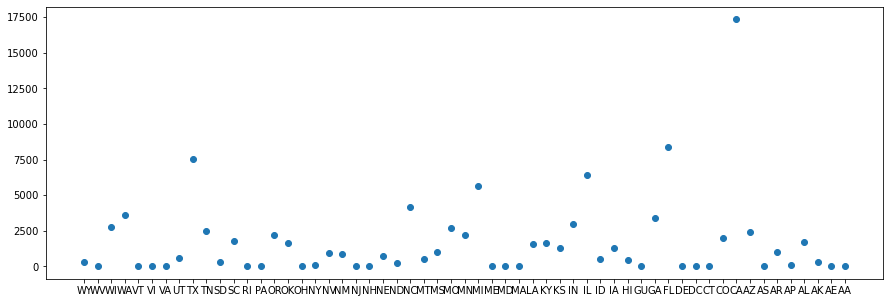

In [11]:
import matplotlib.pyplot as plt

states = donors.STATE.value_counts().sort_index(ascending=False).to_frame()
plt.figure(figsize=(15,5))
plt.scatter(states.index, states["STATE"])
plt.show()

<ipython-input-26-dc47181f6d3a>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


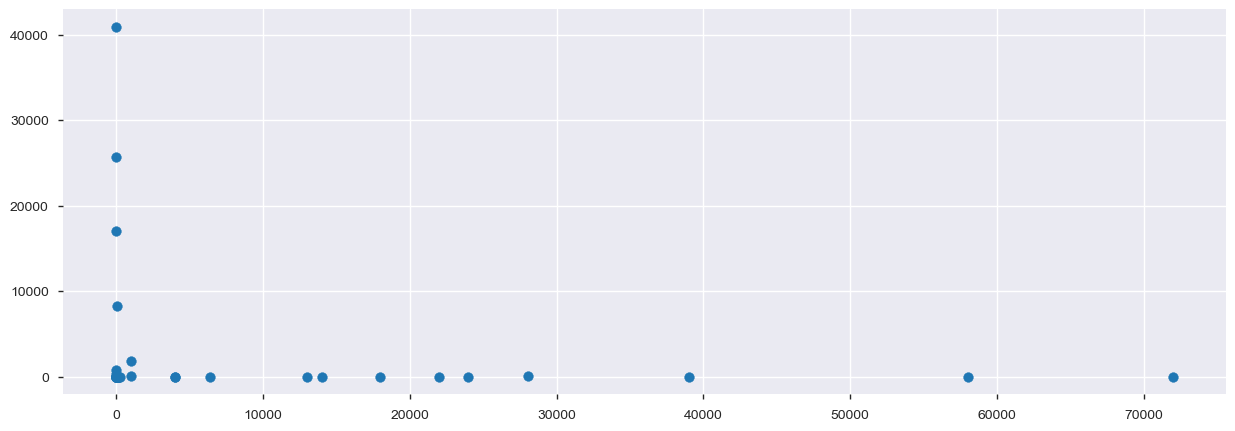

In [26]:
titles = donors.TCODE.value_counts().sort_index(ascending=True).to_frame()


plt.figure(figsize=(15,5))
plt.scatter(titles.index, titles["TCODE"])
plt.show()

In [38]:
birth_date = donors.DOB.value_counts().sort_index(ascending=False).to_frame()
#birth_date["date"] = birth_date.index
birth_date.index =  pd.to_datetime(birth_date.index)

birth_date = birth_date.groupby(pd.Grouper(freq="Y")).sum()


In [39]:
birth_date = birth_date[(birth_date.T != 0).any()]
birth_date

,DOB
1930-12-31,831
1931-12-31,593
1932-12-31,972
1933-12-31,738
1934-12-31,1255
...,...
2012-12-31,1
2013-12-31,2
2015-12-31,5
2016-12-31,6


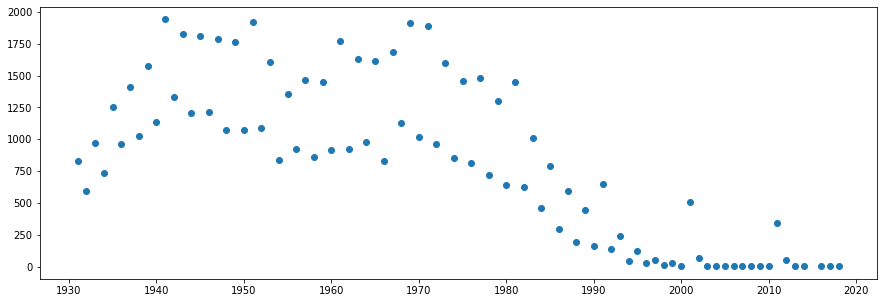

In [40]:
plt.figure(figsize=(15,5))
plt.scatter(birth_date.index, birth_date["DOB"])
plt.show()

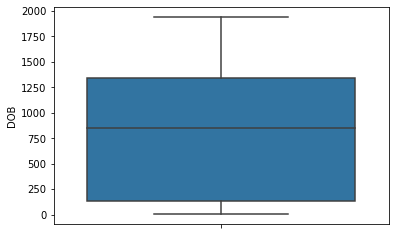

In [52]:
# Single Metric Variable Box Plot
import seaborn as sns
sns.boxplot(y=birth_date["DOB"])

plt.show()

In [30]:
pct_home_val = donors.loc[:,"IC1":"IC20"]
                                     

In [31]:
pct_home_val
#Pelo que eu percebi, por exemplo, a partir do IC5 são percentagens e nao valores exatos. Essas percentagens correspondem
# a valores baseados literalmente nas vizinhanças/bairros dessas pessoas.
#Por exemplo, o IC8 é #Percent Households w/ Income $25,000 - $34,999", como não se pode devolver a percentagem com base 
# numa unica observação, que seria a própria row, pelos vistos esta organização contratou uma empresa que basicamente,
#vende dados. O critério com que as percentagens são feitas é baseada na proximidade/vizinhança/bairro/rua/codigo postal idk
# e faz a percentagem a partir daí
#Mais infos no moodle no forum

,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20
0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2
1,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14
2,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2
3,386,388,396,423,15130,27,12,4,26,22,5,0,0,4,35,5,6,12,30,6
4,240,250,293,321,9836,24,29,23,13,4,4,0,0,2,21,30,22,16,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,433,481,499,535,18807,11,13,13,21,22,13,4,2,2,9,11,11,21,24,16
95408,806,836,802,849,26538,8,9,7,6,11,29,13,2,15,10,0,8,2,13,35
95409,263,264,319,345,12178,21,26,20,18,12,0,3,0,0,26,18,17,11,21,0
95410,552,544,568,556,15948,7,4,11,18,38,15,5,3,0,4,6,15,19,38,13


In [43]:
first_gift = donors.ODATEDW.value_counts().sort_index(ascending=False).to_frame()
#birth_date["date"] = birth_date.index
first_gift.index =  pd.to_datetime(first_gift.index)

first_gift = first_gift.groupby(pd.Grouper(freq="Y")).sum()


In [44]:
first_gift = first_gift[(first_gift.T != 0).any()]
first_gift

,ODATEDW
2003-12-31,1
2004-12-31,1
2005-12-31,2
2006-12-31,14601
2007-12-31,3455
2008-12-31,6671
2009-12-31,5347
2010-12-31,7724
2011-12-31,8557
2012-12-31,7549


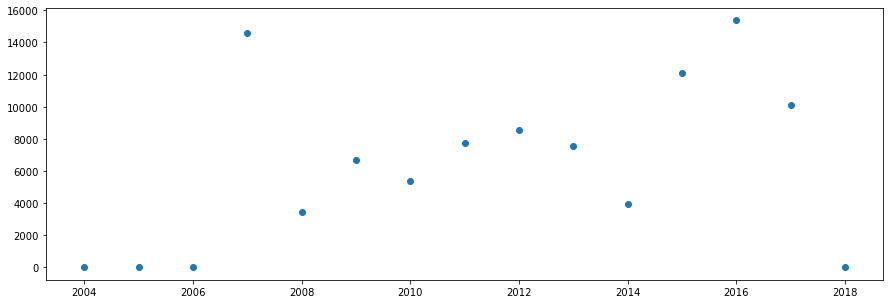

In [48]:
plt.figure(figsize=(15,5))
plt.scatter(first_gift.index, first_gift["ODATEDW"])
plt.show()

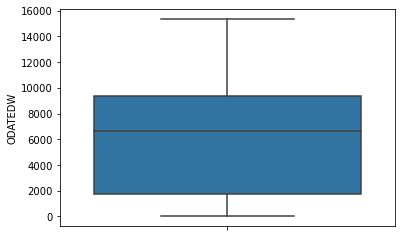

In [55]:
sns.boxplot(y=first_gift["ODATEDW"])

plt.show()

In [61]:
donors.dtypes.head(20)

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
ZIP           object
MAILCODE      object
PVASTATE      object
DOB           object
NOEXCH        object
RECINHSE      object
RECP3         object
RECPGVG       object
RECSWEEP      object
MDMAUD        object
DOMAIN        object
HOMEOWNR      object
CHILD03       object
CHILD07       object
CHILD12       object
dtype: object

In [80]:
pearsoncorr = donors.loc[:,["NUMCHLD","AVGGIFT"]].corr(method='pearson')
pearsoncorr

,NUMCHLD,AVGGIFT
NUMCHLD,1.000000,-0.018747
AVGGIFT,-0.018747,1.000000


In [81]:
pearsoncorr = donors.loc[:,["INCOME","AVGGIFT"]].corr(method='pearson')
pearsoncorr

,INCOME,AVGGIFT
INCOME,1.000000,0.114931
AVGGIFT,0.114931,1.000000


(array([    0.,     0.,     0.,     0.,     0., 95412.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

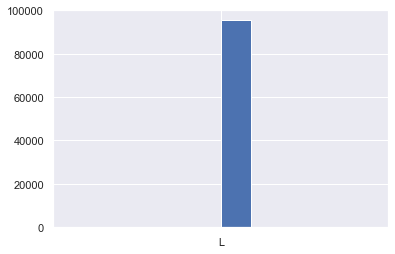

In [161]:
donors["RFA_2R"]
plt.hist(donors["RFA_2R"])
#C=Current Donor
#L=Lapsed Donor
#I=Inactive Donor
#D=Dormant Donor

(array([47675.,     0.,     0., 20545.,     0.,     0., 15291.,     0.,
            0., 11901.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

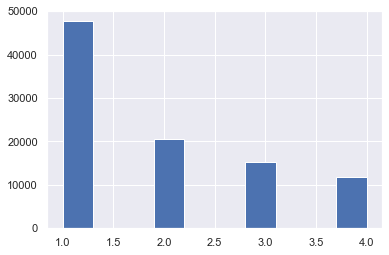

In [96]:
plt.hist(donors["RFA_2F"],bins=10)
#1=One gift in the period of recency
#2=Two-Four gifts in the period of recency
#5=Five+ gifts in the period of recency


(array([21639.,     0.,     0., 19397.,     0.,     0., 46964.,     0.,
            0.,  7412.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

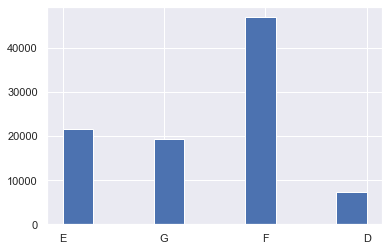

In [162]:
plt.hist(donors["RFA_2A"])
#DE ACORDO COM O GRAFICO
#E=$10.00 - $14.99
#G=$25.00 and above
#F=$15.00 - $24.99
#D=$5.00  -  $9.99

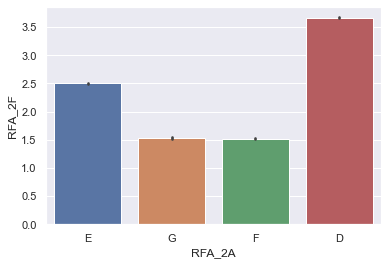

In [168]:
sns.barplot(x="RFA_2A", y="RFA_2F", data=donors)

(array([22228.,     0.,     0.,     0.,     0., 52354.,     0.,     0.,
            0., 20830.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

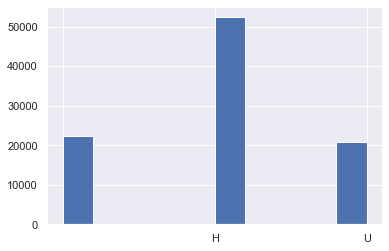

In [117]:
plt.hist(donors["HOMEOWNR"])

In [15]:
import seaborn as sns

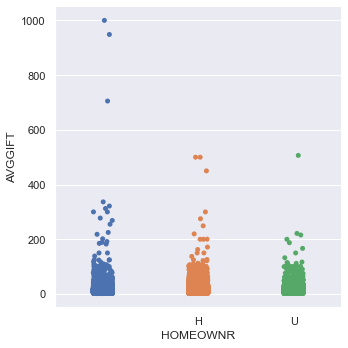

In [144]:
sns.catplot(x="HOMEOWNR", y="AVGGIFT", data=donors)

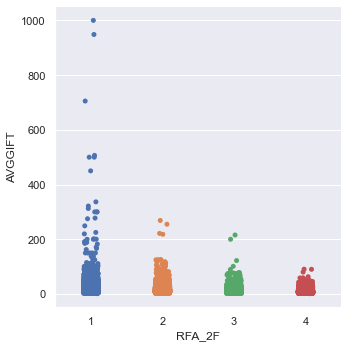

In [129]:
sns.catplot(x="RFA_2F", y="AVGGIFT", data=donors)

In [143]:
pearsoncorr = donors.loc[:,["RFA_2F","AVGGIFT"]].corr(method='pearson')
pearsoncorr

,RFA_2F,AVGGIFT
RFA_2F,1.000000,-0.277168
AVGGIFT,-0.277168,1.000000


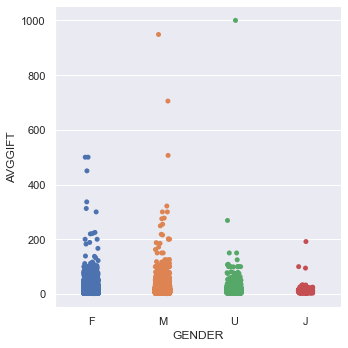

In [148]:
#sns.catplot(x="GENDER", y="AVGGIFT", data=donors)
#M = Male
#F = Female
#U = Unknown
#J = Joint Account, unknown gender
donors["GENDER"].replace({' ':'U', 'C':'U','A':'U'}, inplace=True)
sns.catplot(x="GENDER", y="AVGGIFT", data=donors)

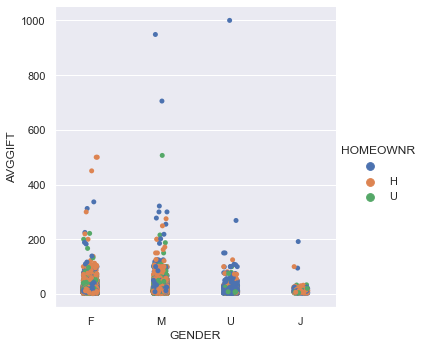

In [149]:
sns.catplot(x="GENDER", y="AVGGIFT", hue="HOMEOWNR", data=donors)

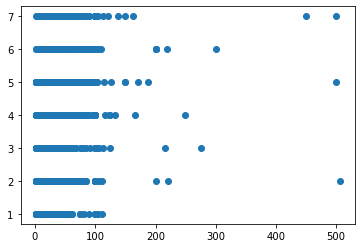

In [17]:
plt.scatter(donors["AVGGIFT"], donors["INCOME"])
plt.show()

C:\Users\Madal\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Madal\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2413., 3454., 4085., 4237., 4810., 5280., 5825., 6198., 6793.,
        7585.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

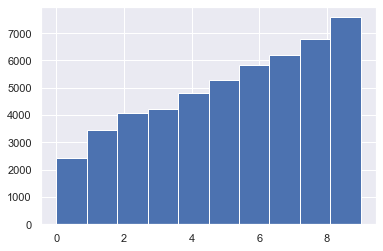

In [154]:
plt.hist(donors["WEALTH1"])

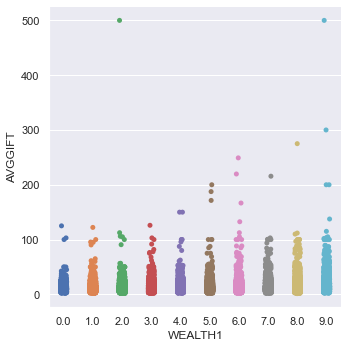

In [156]:
sns.catplot(x="WEALTH1", y="AVGGIFT", data=donors)

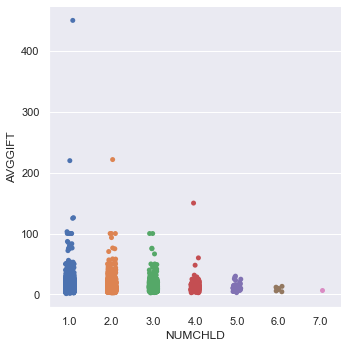

In [157]:
sns.catplot(x="NUMCHLD", y="AVGGIFT", data=donors)

In [182]:
lastdate = donors["LASTDATE"].value_counts().sort_index(ascending=False).to_frame()
lastdate.index =  pd.to_datetime(lastdate.index)
lastdate = lastdate.groupby(pd.Grouper(freq="Y")).sum()

In [181]:
lastdate = lastdate[(lastdate.T != 0).any()]
lastdate

,LASTDATE
2017-02-01,825
2017-01-01,748
2016-12-01,767
2016-11-01,434
2016-10-01,410
2016-09-01,281
2016-08-01,208
2016-07-01,144
2016-06-01,148
2016-05-01,220


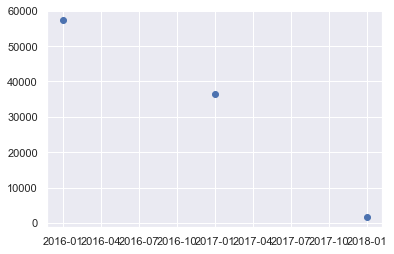

In [186]:
plt.plot_date(lastdate.index, lastdate["LASTDATE"],xdate=True)
plt.show()

In [225]:
from pandas_profiling import ProfileReport

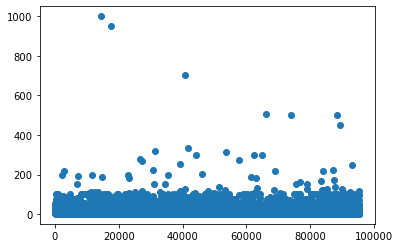

In [19]:
plt.scatter(donors.index, donors["AVGGIFT"])
plt.show()

In [20]:
donors["TIMELAG"] 

0         4.0
1        18.0
2        12.0
3         9.0
4        14.0
         ... 
95407     NaN
95408     NaN
95409     3.0
95410     4.0
95411     6.0
Name: TIMELAG, Length: 95412, dtype: float64

In [43]:
donors["NEXTDATE"]

0        2010-03-01
1        2015-04-01
2        2011-01-01
3        2007-11-01
4        2000-05-01
            ...    
95407           NaN
95408           NaN
95409    2015-01-01
95410    2007-04-01
95411    2008-09-01
Name: NEXTDATE, Length: 95412, dtype: object

In [49]:
donors["LASTDATE"]

0       2015-12-01
1       2015-12-01
2       2015-12-01
3       2015-12-01
4       2016-01-01
           ...    
95407   2016-02-01
95408   2016-03-01
95409   2016-10-01
95410   2017-01-01
95411   2016-12-01
Name: LASTDATE, Length: 95412, dtype: datetime64[ns]

In [48]:
donors["LASTDATE"] = pd.to_datetime(donors["LASTDATE"])
donors["NEXTDATE"] = pd.to_datetime(donors["NEXTDATE"])

In [57]:
test = donors[["LASTDATE","NEXTDATE","TIMELAG"]]
test

,LASTDATE,NEXTDATE,TIMELAG
0,2015-12-01,2010-03-01,4.0
1,2015-12-01,2015-04-01,18.0
2,2015-12-01,2011-01-01,12.0
3,2015-12-01,2007-11-01,9.0
4,2016-01-01,2000-05-01,14.0
...,...,...,...
95407,2016-02-01,NaT,NaN
95408,2016-03-01,NaT,NaN
95409,2016-10-01,2015-01-01,3.0
95410,2017-01-01,2007-04-01,4.0


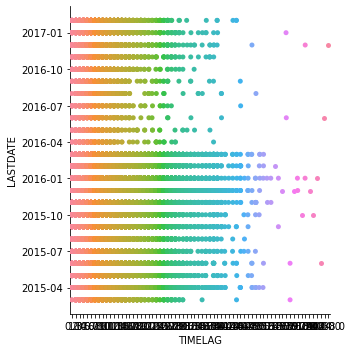

In [59]:
sns.catplot(x="TIMELAG", y="LASTDATE", data=donors)

In [42]:
donors.dtypes.head(60)

Unnamed: 0      int64
ODATEDW        object
OSOURCE        object
TCODE           int64
STATE          object
ZIP            object
MAILCODE       object
PVASTATE       object
DOB            object
NOEXCH         object
RECINHSE       object
RECP3          object
RECPGVG        object
RECSWEEP       object
MDMAUD         object
DOMAIN         object
HOMEOWNR       object
CHILD03        object
CHILD07        object
CHILD12        object
CHILD18        object
NUMCHLD       float64
INCOME        float64
GENDER         object
WEALTH1       float64
HIT             int64
MBCRAFT       float64
MBGARDEN      float64
MBBOOKS       float64
MBCOLECT      float64
MAGFAML       float64
MAGFEM        float64
MAGMALE       float64
PUBGARDN      float64
PUBCULIN      float64
PUBHLTH       float64
PUBDOITY      float64
PUBNEWFN      float64
PUBPHOTO      float64
PUBOPP        float64
DATASRCE       object
MALEMILI        int64
MALEVET         int64
VIETVETS        int64
WWIIVETS        int64
LOCALGOV  